In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.tree import plot_tree


In [14]:
path = ("/content/drive/MyDrive/dataset/diabetes_dataset.csv")
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df=df.dropna()

In [58]:
df.shape

(768, 9)

In [16]:
checkone = df[df['Outcome']==1]
countone = checkone.shape[0]
print(countone)
checktwo=df[df['Outcome']==0]
counttwo = checkone.shape[0]
print(counttwo)



268
268


In [17]:
Insulin = df['Insulin'].mean()

SkinThickness  = df['SkinThickness'].mean()
print(Insulin)
print(SkinThickness)


79.79947916666667
20.536458333333332


In [18]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']





In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [46]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=3,min_samples_leaf=7 )
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=0)

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=7)

In [39]:

from sklearn.tree import export_text
tree_rules = export_text(classifier, feature_names=list(x_train.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- SkinThickness <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  5.50
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- DiabetesPedigreeFunction <= 0.23
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.23
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  94.50
|   |   |   |   |--- class: 1
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 146.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.41
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.41
|   |   |   |   

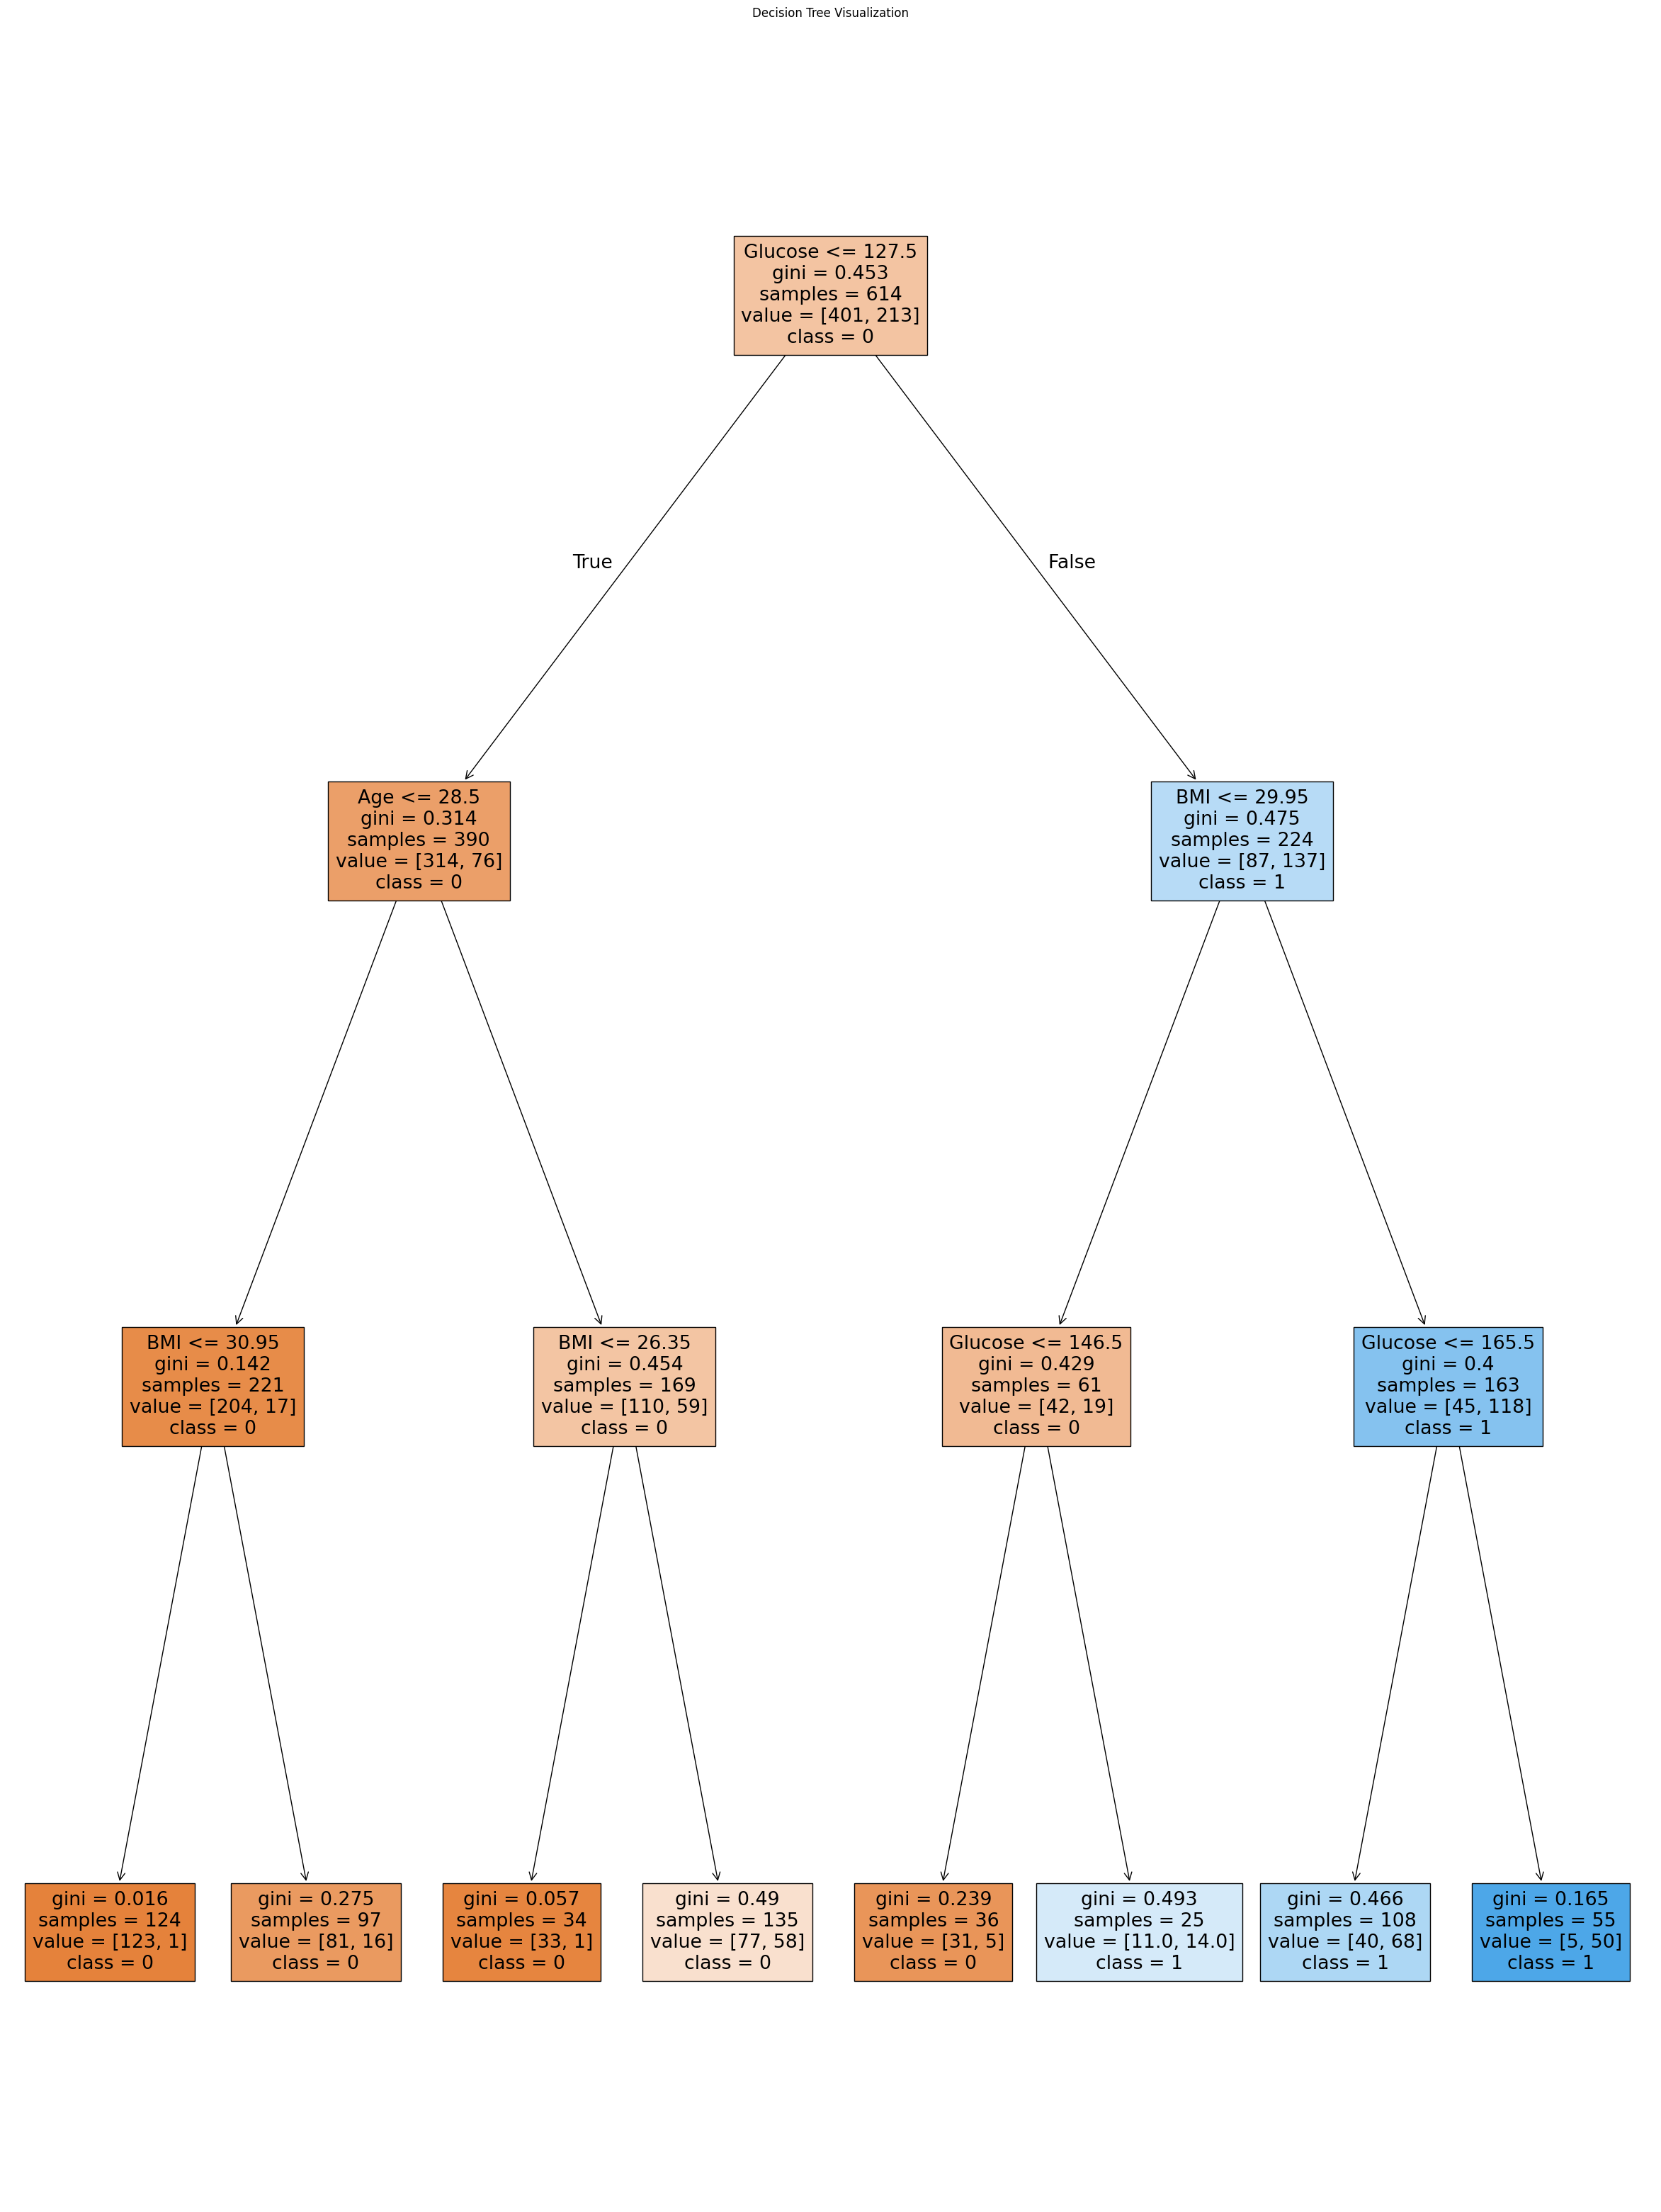

In [47]:
plt.figure(figsize=(30, 40))
plot_tree(classifier, feature_names=x_train.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [48]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree Classifier: 75.97%


In [53]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree Classifier: 75.32%
